In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder 
import seaborn
import nltk
import string
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.stem.porter import PorterStemmer
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [2]:
df=pd.read_csv('./spam.csv',encoding=('ISO-8859-1'))

In [4]:
df.head(15)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

### 1. cleaning data 
### 2. EDA
### 3. Text Preprocessing
### 4. Model Building
### 5. Evaluation
### 6. Improvement
### 7. Website
### 8. Deploy

# Data cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# since last three column has very less non-null values therefore we are removing it

In [7]:
df.drop(columns=[ 'Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
#renaming the columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [9]:
encoder=LabelEncoder()

In [10]:
df['target']=encoder.fit_transform(df['target'])

In [11]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
#checking for duplicate values
df.duplicated().sum()

403

In [13]:
df=df.drop_duplicates(keep='first')

In [14]:
df.shape

(5169, 2)

# EDA : Exploratory Data Analysis

In [15]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

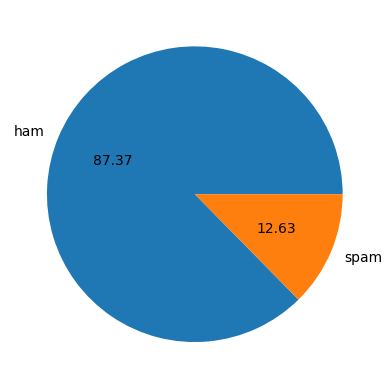

In [16]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [17]:
# since data is imbalnce so for enhancing the dataset we are adding 3 column
#    column 1: number of character
#    column 2: number of words
#    column 3: number of sentences  

# for this we are installing nltk:natual language toolkit

In [18]:
#!pip install nltk

In [19]:
#nltk.download('punkt')

In [20]:
df['num_characters']=df['text'].apply(len)

In [21]:
df.head(5)

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [22]:
#number of words

df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [23]:
#number of sentances
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [24]:
df.head(10)

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4
6,0,Even my brother is not like to speak with me. ...,77,18,2
7,0,As per your request 'Melle Melle (Oru Minnamin...,160,31,2
8,1,WINNER!! As a valued network customer you have...,158,32,5
9,1,Had your mobile 11 months or more? U R entitle...,154,31,3


In [25]:
# ham
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [26]:
# spam
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

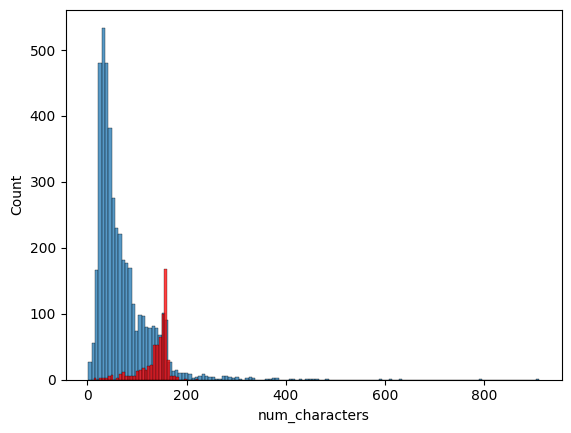

In [27]:
seaborn.histplot(df[df['target']==0]['num_characters'])
seaborn.histplot(df[df['target']==1]['num_characters'],color='red')

# Data preprocessing 
#####  lower case
##### Tokenization
##### Removing special characters
##### Removing stop words and puncuations
##### Stemming
    

In [28]:
# this function will do all the data preprocessing
def transform_text(text):
    text=text.lower()            # converting into lower
    text=nltk.word_tokenize(text)            # converting into words
    
    y=[]            # creating a list and removing the symbols from the text and returning it
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text=y[:]
    y.clear()
    
    for i in text:                #removing all the punctuation and stopwords
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    ps=PorterStemmer()           #steming all the words i.e   dance,dancing,danced will convert to dance
    
    text=y[:]
    y.clear()
    
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [29]:
transform_text("hii this is sarthak jaiswal here i got 80% dance,dancing,danced")

'hii sarthak jaiswal got 80 danc danc danc'

In [30]:
df['transformed_text']=df['text'].apply(transform_text)

In [31]:
df.head(5)

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [32]:
# generating wordcloud for both spam and ham

In [33]:
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')


In [34]:
spam_word_cloud=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

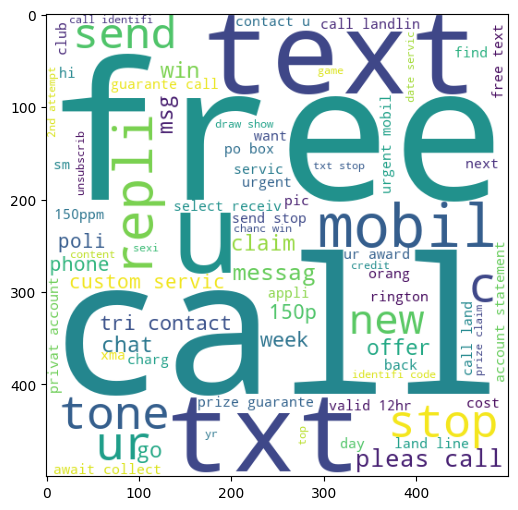

In [35]:
plt.figure(figsize=(25,6))
plt.imshow(spam_word_cloud)

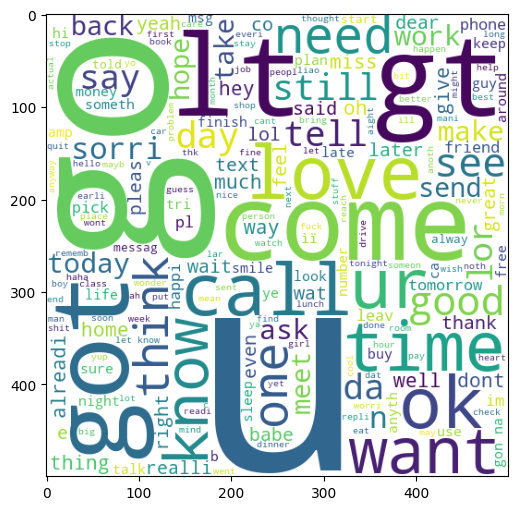

In [36]:
ham_word_cloud=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(25,6))
plt.imshow(ham_word_cloud)

In [37]:
# finding top 30 words of spam and ham

In [38]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

temp=pd.DataFrame(Counter(spam_corpus).most_common(30))


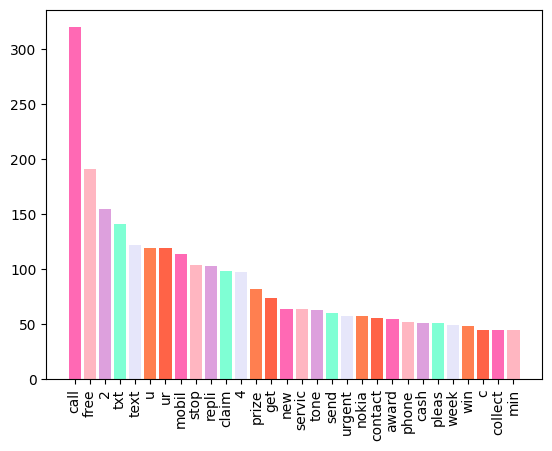

In [39]:
rainbow_colors = ['pink', 'violet', 'blue', 'green', 'yellow', 'orange', 'red']
rainbow_colors = ['hotpink', 'lightpink', 'plum', 'aquamarine', 'lavender', 'coral', 'tomato']
plt.bar(temp[0],temp[1],color=rainbow_colors)
plt.xticks(rotation='vertical')
plt.show()

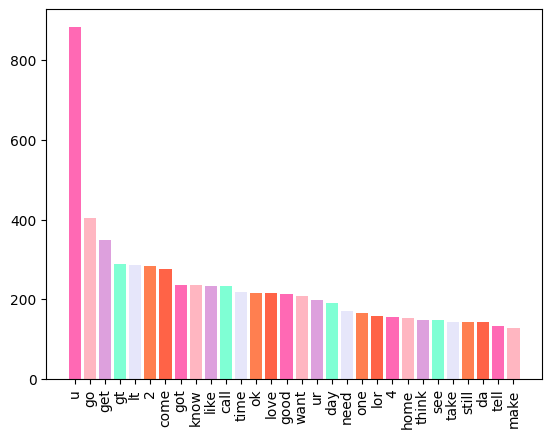

In [40]:
# top 30 words of ham
ham_corus=[]

for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corus.append(word)

temp=pd.DataFrame(Counter(ham_corus).most_common(30))

rainbow_colors = ['hotpink', 'lightpink', 'plum', 'aquamarine', 'lavender', 'coral', 'tomato']
plt.bar(temp[0],temp[1],color=rainbow_colors)
plt.xticks(rotation='vertical')
plt.show()

# model training

##### first we start with naive based classifier as for textual data naive based is best 

In [41]:
#  As we aware of we need numeric data for machine learning but we have textual 
#  therefor we first convert our text to vectors
# 

In [42]:
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

# first we use CountVectorizer but with this we dont get good precision but with tfidf we got good precision

In [43]:
X=tfidf.fit_transform(df['transformed_text']).toarray()
X.shape

(5169, 3000)

In [44]:
Y=df['target'].values

In [45]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [46]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [47]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [48]:
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [49]:
bnb.fit(x_train,y_train)
y_pred3=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [50]:
# comparing performance of different model

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [52]:
svc=SVC(kernel='sigmoid',gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier()
lrc=LogisticRegression(solver='liblinear',penalty='l1')
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50,random_state=2)

In [53]:
classifier={
    'SVC':svc,
    'KN':knc,
    'NB':mnb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'AdaBoost':abc,
    'BgC':bc,
    'ETC':etc,
    'GBDT':gbdt
}

In [54]:
def train_classifier(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    predict=model.predict(x_test)
    
    precision=precision_score(y_test,predict)
    accuracy=accuracy_score(y_test,predict)
    
    return accuracy,precision

In [68]:
model_name=[]
accuracy=[]
precision=[]
for name,model in classifier.items():
    model_accuracy,model_precision=train_classifier(model,x_train,x_test,y_train,y_test)
    model_name.append(name)
    accuracy.append(model_accuracy)
    precision.append(model_precision)

model_performance_dataframe=pd.DataFrame({'Name':model_name,'accuracy':model_accuracy,'precision':precision})
model_performance_dataframe

,Name,accuracy,precision
0,SVC,0.946809,0.974790
1,KN,0.946809,1.000000
2,NB,0.946809,1.000000
3,DT,0.946809,0.801527
4,LR,0.946809,0.970297
5,RF,0.946809,0.982906
6,AdaBoost,0.946809,0.929204
7,BgC,0.946809,0.868217
8,ETC,0.946809,0.974576
9,GBDT,0.946809,0.919192


In [70]:
# we are chosing the naive baye classifier as it gives us best precision and accuracy 
# now we are using pickle to save our model and vectorised oblject

In [74]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))